<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline: Azar 18th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [156]:
# Set your student number
student_number = 98101125
Name = 'Bahar'
Last_Name = 'Asadi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Azar 18th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 28th 23:59:59.

In [157]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30+5 Points)

<font size=4>
Author: Pooya Moini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Bayesian Networks

In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28$ (784) pixels. Consider the Bayesian network in Figure 1 . The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image. The variables in the top layer, $Z_{1}$ and $Z_{2}$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

![Figure1](./Images/fig1.png)

The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_{1}, z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. 

For this programming assignment, we provide a pretrained model trained_mnist_model. The starter code loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_{1}\right)=\operatorname{Val}\left(Z_{2}\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_{j}\right)=\{0,1\}$, i.e., the image is binary.

### 1. 
How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?

<font color=blue>
    * The random vector $X_{1: 784}$ has $2^{784} = 1.02 * 10^{236}$ possible values.
</font>

How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images? (5 points)

<font color=blue>
    * We would need $2^{784} - 1$ paramaters to specify an arbitrary probability distribution over the images.
</font>

In [3]:
# Write here

In [4]:
# extra space

Run below codes to load the network and its functions.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [114]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]


In [115]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [116]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open('Helper_codes/trained_mnist_model', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [117]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('Helper_codes/trained_mnist_model')

### 2.
Produce 5 samples from the joint probability distribution $\left(z_{1}, z_{2}, x_{1: 784}\right) \sim p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables). (7 points)

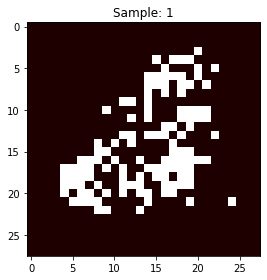

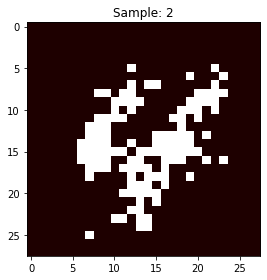

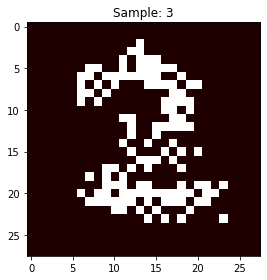

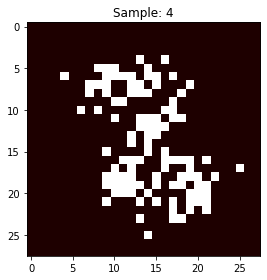

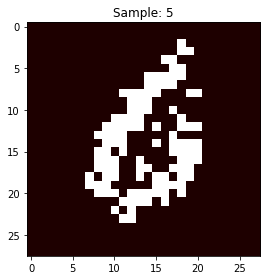

In [135]:
# write here
def making_five_samples():
    '''
    Plots the pixel variables sampled from the joint distribution as 28 x 28
    images.
    '''
    plt.figure()
    for i in range(5):        
        '''
        Sampling from the joint probability distribution specified by the model,
        and returning the sampled values of all the pixel variables (X vector).
        '''
        z1_distribution = []
        z2_distribution = []
        for z_val in disc_z1:
            z1_distribution.append(get_p_z1(z_val))
        for z_val in disc_z2:
            z2_distribution.append(get_p_z2(z_val))
    
        z1_sample = np.random.choice(disc_z1, p=z1_distribution)
        z2_sample = np.random.choice(disc_z2, p=z2_distribution)
        pixel_distribution = get_p_x_cond_z1_z2(z1_sample, z2_sample)
        created_sample = []
        for pix_prob in pixel_distribution:
            created_sample.append(np.random.choice([1, 0], p=[pix_prob, 1.0-pix_prob]))
        #plot samples
        plt.imshow(np.array(created_sample).reshape(28, 28), cmap='pink')
        plt.title('Sample: ' + str(i+1))
        plt.tight_layout()
        plt.show()
    plt.close()
    return
making_five_samples()

In [133]:
# extra space

### 3.

For each possible value of
$$
\left(\bar{z}_{1}, \bar{z}_{2}\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\}
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_{1}, Z_{2}=\left(\bar{z}_{1}, \bar{z}_{2}\right)\right] .$ This is the expected image corresponding to each possible value of the latent variables $Z_{1}, Z_{2} .$ Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_{1}$ and $Z_{2}$ respectively. What is the intuitive role of the $Z_{1}, Z_{2}$ variables in this model? (8 points)

<font color=blue>
    * The intuitive role for Z1 (x-axis) appears to indicate how circular the value is (from
    0 to 7 and from 3 to black). Z2 on the other hand is more difficult to tell intuitively,
    though it appears to determine the horizontal width/lines.
    </font>

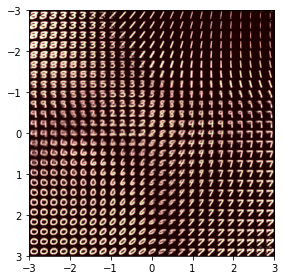

In [140]:
# write here
def compt_cond_ex_z1_z2():
    '''
    Plots the expected images for each latent configuration on a 2D grid.
    '''
    canvas = np.empty((28*len(disc_z1), 28*len(disc_z2)))
    
    for i, z1_val in enumerate(disc_z1):
        for j, z2_val in enumerate(disc_z2):
            canvas[(len(disc_z1)-i-1)*28:(len(disc_z2)-i)*28, (j)*28:(j+1)*28] = get_p_x_cond_z1_z2(z1_val, z2_val).reshape(28, 28)
    plt.figure()
    plt.imshow(canvas, extent = [-3, 3, 3, -3], cmap='pink')
    plt.tight_layout()
    plt.show()
    plt.close()
    return
compt_cond_ex_z1_z2()

In [121]:
# extra space

In [122]:
mat = loadmat('Helper_codes/testval.mat')
val_data = mat['val_x']
test_data = mat['test_x']

### 4.
You are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_{1}} \sum_{z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted". (15 points)

In [123]:
# write here
def plot_histogram(data, title = 'histogram', ylabel = 'frequency'):
    plt.figure() 
    plt.hist(data)  
    plt.ylabel('frequency') 
    plt.title(title) 
    plt.show() 

def get_network_conditionals():
    '''
    returns P(z1, z2), P(x = 1 | z_1, z_2), P(x = 0 | z_1, z_2)
    '''
    zs = len(disc_z1) * len(disc_z2)
    xk_conditional = np.zeros((2, zs, NUM_PIXELS))  # size = 2x625x784
    z1_z2_joint = np.zeros(zs)  # size = 625
    for i, z1_val in enumerate(disc_z1):
        for j, z2_val in enumerate(disc_z2):
            index = i * len(disc_z2) + j
            z1_z2_joint[index] = get_p_z1(z1_val) * get_p_z2(z2_val) # P(z1, z2)
            xk_conditional[1, index] = get_p_x_cond_z1_z2(z1_val, z2_val) # P(x = 1 | z_1, z_2)
            xk_conditional[0, index] = 1 - xk_conditional[1, index] # P(x = 0 | z_1, z_2)

    return z1_z2_joint, xk_conditional[0], xk_conditional[1]

In [144]:
# extra space
def compute_log_likelikehoods(data, log_x0, log_x1, log_z1_z2):
    '''
    Computes the log likelihood for all samples in data using the given distributions.
    '''
    log_likelihood = []
    for sample in data:
        log_xk_sample = np.where(sample == 1, log_x1, log_x0)
        log_x_sample = np.sum(log_xk_sample, axis=1)
        inner_sum = log_x_sample + log_z1_z2
        inner_max = np.max(inner_sum)
        log_likelihood.append(inner_max + np.log(np.sum(np.exp(inner_sum - inner_max))))
    return np.array(log_likelihood)

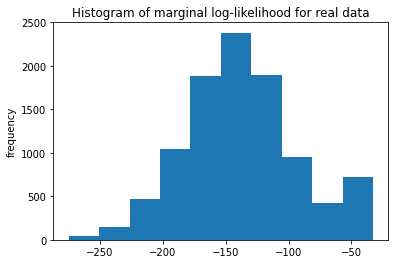

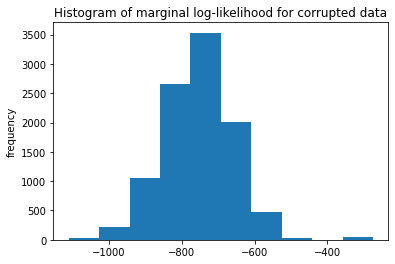

In [145]:
# extra space
def distinguish_real_corrupted():
    '''
    Loads the data and plots the histograms.
    '''
    z1_z2_joint, xk0_conditional, xk1_conditional = get_network_conditionals()

    # Use exp-log-sum trick.
    log_xk0_conditional = np.log(xk0_conditional)
    log_xk1_conditional = np.log(xk1_conditional)
    log_z1_z2_joint = np.log(z1_z2_joint)

    validation_log_likelihood = compute_log_likelikehoods(val_data, log_xk0_conditional, log_xk1_conditional, log_z1_z2_joint)

    val_mean = np.mean(validation_log_likelihood)
    val_stddev = np.std(validation_log_likelihood)

    test_log_likelihood = compute_log_likelikehoods(test_data, log_xk0_conditional, log_xk1_conditional, log_z1_z2_joint)

    real_image_validator = np.abs(test_log_likelihood - val_mean) <= (3 * val_stddev)
    real_marginal_log_likelihood = test_log_likelihood[real_image_validator]
    corrupt_marginal_log_likelihood = test_log_likelihood[np.logical_not(real_image_validator)]

    plot_histogram(real_marginal_log_likelihood, title='Histogram of marginal log-likelihood for real data')
    plot_histogram(corrupt_marginal_log_likelihood, title='Histogram of marginal log-likelihood for corrupted data')
    return
distinguish_real_corrupted()

---

# Q2 (40 Points)

<font size=4>
Author: Mohammad Mahdi Asmae
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
import copy
############################################################
# import necessary packages in this cell                   #
# please set a random seed to get the same results in      #
# different runs (1 Points)                                #
############################################################

In [3]:
# extra space

In [4]:
# extra space

In [103]:
class BN(object):
    """Bayesian network containing only boolean-variable nodes."""

    def __init__(self, node_sequence):
        """
        Nodes are in topological order
        node_sequence: an iretable object which contains elements in form of (variable name, parents name, cpt) that represents
        each node.
        """
        self.nodes = []
        self.variables = []
        node_sequence = node_sequence
        for alone_node in node_sequence:
            node = Node(alone_node[0], alone_node[1], alone_node[2])
            self.nodes.append(node)
            self.variables.append(node.variable)
            for parent in node.parents:
                self.get_node(parent).children.append(node)

    def get_node(self, var):
        for node in self.nodes:
            if node.variable == var:
                return node
    
    def domain(self):
        """Return the domain of var"""
        return [True, False]
    
    def cpt(self, var):
        node = self.get_node(var)
        return node.cpt
    
    def extend(self, s, var, val):
        """Copy dict s and extend it by setting var to val; return copy."""
        return {**s, var: val}

    def enumeration_ask(self, X_value, evidence):
        """The function "pmf" is equal to "enumeration_ask" function
        This function gets a variable and its value as query and a list of evidences and returns probability mass function P(Q=q|E=e)
        Parameters
        ----------
        query:
            a variable and its value
            e.g. ('a', 1)
        evidence:
            dictionary of variables and their values
            e.g. {'B': False, 'C': True}
        
        Returns
        -------
        PMF: float
            P(query|evidence)
        """
            ############################################################
            # (3 Points)                                               #
            ############################################################
        pmf = {}
        X = X_value[0]
        value = X_value[1]
        for xi in self.domain():
            pmf[xi] = self.enumerate_all(self.variables, self.extend(evidence, X, xi))
        # normalizing
        total = sum(pmf.values())
        if not np.isclose(total, 1.0):
            for val in pmf:
                pmf[val] /= total
        return pmf[value]

    def enumerate_all(self, variables, evidence):
        """
        Return the sum of those entries in P(variables | e{others})
        consistent with evidence. Parents must precede children in variables.
        """
        if not variables:
            return 1.0
        Y, rest = variables[0], variables[1:]
        Y_node = self.get_node(Y)
        if Y in evidence:
            return Y_node.prob(evidence[Y], evidence) * self.enumerate_all(rest, evidence)
        else:
            return sum(Y_node.prob(y, evidence) * self.enumerate_all(rest, self.extend(evidence, Y, y))
                       for y in self.domain())
    
    def is_comp_ev(self, event, evidence):
        for ev in evidence.keys():
            if evidence[ev] != event[ev]:
                return False
        return True
    def is_comp_que(self, event, query):
        if query[1] != event[query[0]]:
            return False
        return True
    
    def weighted_sample(self, evidence):
        """
        Sample an event from bn that's consistent with the evidence e;
        return the event and its weight, the likelihood that the event
        accords to the evidence.
        """
        w = 1
        event = dict(evidence)
        for node in self.nodes:
            Xi = node.variable
            if Xi in evidence:
                w *= node.prob(evidence[Xi], event)
            else:
                event[Xi] = node.sample(event)
        return event, w

    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        ############################################################
        # (27 Points)                                              #
        #     Prior sampling (6 points)                            #
        #     Rejection sampling (6 points)                        #
        #     Likelihood weighting (7 points)                      #
        #     Gibbs sampling (8 points)                            #
        ############################################################
        #Your code
        # query: list
        # list of variables an their values
        # e.g. [('a', 0), ('e', 1)]
        # evidence: dictionary
        # dictionary of observed variables and their values
        # e.g. {'b': 0, 'c': 1}
        if sampling_method == 'Prior':
            cnt_evidence = 0
            cnt_evidence_query = 0
            for i in range(num_iter):
                event = {}
                for node in self.nodes:
                    event[node.variable] = node.sample(event)
                if self.is_comp_ev(event, evidence):
                    cnt_evidence += 1
                    if self.is_comp_que(event, query):
                        cnt_evidence_query += 1
            if cnt_evidence == 0:
                    return 0
            return cnt_evidence_query/cnt_evidence
        
        elif sampling_method == 'Rejection':
            cnt_evidence_query = 0
            iter_counter = 0
            while iter_counter < num_iter:
                event = {}
                for node in self.nodes:
                    event[node.variable] = node.sample(event)
                if self.is_comp_ev(event, evidence):
                    iter_counter += 1
                    if self.is_comp_que(event, query):
                        cnt_evidence_query += 1
            return cnt_evidence_query/iter_counter
        
        elif sampling_method == 'Likelihood Weighting':
            cnt_evidence_query = 0
            w_sum = 0
            for i in range(num_iter):
                event, w =self.weighted_sample(evidence)
                if self.is_comp_que(event, query):
                    cnt_evidence_query += w
                w_sum += w
            return cnt_evidence_query/w_sum
        
        elif sampling_method == 'Gibbs':
            num_burnin_cnt = 0
            cnt_evidence_query = 0
            event = dict(evidence)
            not_in_evidence = set(self.variables).difference(set(evidence.keys()))
            event.update((key, np.random.choice(self.domain())) for key in not_in_evidence)
            for i in range(int(num_iter + num_burnin)):
                for var in not_in_evidence:
                    event.pop(var)
                    que = self.enumeration_ask((var, True), event)
                    event[var] = np.random.choice((True, False), p = [que, 1 - que])
                num_burnin_cnt += 1
                if num_burnin_cnt >= num_burnin and self.is_comp_que(event, query):
                    cnt_evidence_query += 1
            return cnt_evidence_query/num_iter
        else:
            return "Not Valid Method For Sampling"
        """
        Parameters
        ----------
        query: list
            list of variables an their values
            e.g. [('a', 0), ('e', 1)]
        evidence: list
            list of observed variables and their values
            e.g. [('b', 0), ('c', 1)]
        sampling_method:
            "Prior", "Rejection", "Likelihood Weighting", "Gibbs"
        num_iter:
            number of the generated samples 
        num_burnin:
            (used only in gibbs sampling) number of samples that we ignore at the start for gibbs method to converge
            
        Returns
        -------
        probability: float
            approximate P(query|evidence) calculated by sampling
        """
class Node:
    """
    A conditional probability distribution for a boolean variable,
    P(X | parents). Nodes of BayesNet
    """
    def __init__(self, X, parents, cpt):
        """
        X: variable name,
        parents: a sequence of variable names or a space-separated string. Representing the names of parent nodes
        cpt: the conditional probability table
        Some examples are shown below:
        A = Node('A', '', 0.8)
        B = Node('B', 'A', {True: 0.3, False: 0.9}),
        C = Node('C', 'A B', {(True, True): 0.05, (True, False): 0.5, (False, True): 0.15, (False, False): 0.7})
        """
        parents = parents.split()
        if isinstance(cpt, (float, int)):  # no parents, 0-tuple
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # one parent, 1-tuple
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v,): p for v, p in cpt.items()}
        self.variable = X
        self.parents = parents
        self.cpt = cpt
        self.children = []

    def prob(self, value, event):
        """
        Return the conditional probability
        P(X=value | parents=parent_values), where parent_values
        are the values of parents in event. (event must assign each
        parent a value.)
        """
        p_event = None
        if isinstance(event, tuple) and len(event) == len(self.parents): # one tuple
            p_event = event
        else: # dictionary
            p_event = tuple([event[var] for var in self.parents])
        p_true = self.cpt[p_event]
        if value:
            return p_true
        else:
            return 1 - p_true

    def sample(self, event):
        """
        Sample from the distribution for this variable conditioned
        on event's values for parent_variables. That is, return True/False
        at random according with the conditional probability given the
        parents.
        """
        var = self.prob(True, event) > random.uniform(0, 1)
        return var

In [104]:
# extra space
T, F = True, False

test = BN([
    ('A', '', 0.8),
    ('B', '', 0.55),
    ('E', 'B', {T: 0.3, F: 0.9}),
    ('C', 'A E', {(T, T): 0.05, (T, F): 0.5, (F, T): 0.15, (F, F): 0.7}),
    ('D', 'A C', {(T, T): 0.67, (T, F): 0.5, (F, T): 0.65, (F, F): 0.8}),
    ('F', 'D', {T: 0.2, F: 0.25})
])
print(test.get_node('F').cpt)

{(True,): 0.2, (False,): 0.25}


In [109]:
print("Test PMF:", test.enumeration_ask(('F',True), {'A': True, 'C': True}))
print("Test Sampling 'Gibbs Method':", test.sampling(('E', True),  {'A': False}, 'Gibbs', 100))
print("Test Enumeration:", test.enumeration_ask(('E', True),  {'A': False}))
# extra space

Test PMF: 0.21649999999999997
Test Sampling 'Gibbs Method': 0.68
Test Enumeration: 0.57


In [106]:
# extra space

In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

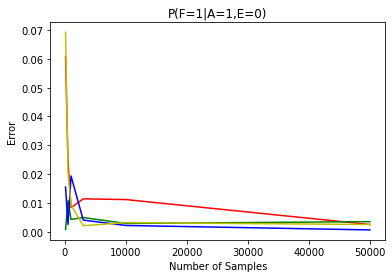

Prior : Red
Rejection : Green
Weighted likelihood : Blue
Gibbs : Yellow


In [151]:
############################################################
# x-axis: number of samples                                #
# y-axis: error                                            #
# Your plot have to contain errors for all diffrent        #
# methods of sampling that you've implemented (3 Points)   #
############################################################
#Your code
# plot for the first query
x_axis = [100, 500, 1000, 3000, 10000, 50000]
y_axis_prior = []
y_axis_reject = []
y_axis_likelihood_weighting = []
y_axis_gibbs = []
y_correct_1 = test.enumeration_ask(('F',True), {'A': True, 'E': False})
y_correct_2 = test.enumeration_ask(('C',False), {'F': True, 'D': False})
for i in x_axis:
    y_estimated = test.sampling(('F',True), {'A': True, 'E': False}, 'Prior', i)
    y_axis_prior.append(np.abs(y_correct_1 - y_estimated))
for i in x_axis:
    y_estimated = test.sampling(('F',True), {'A': True}, 'Rejection', i)
    y_axis_reject.append(np.abs(y_correct_1 - y_estimated))
for i in x_axis:
    y_estimated = test.sampling(('F',True), {'A': True, 'E': False}, 'Likelihood Weighting', i)
    y_axis_likelihood_weighting.append(np.abs(y_correct_1 - y_estimated))
for i in x_axis:
    y_estimated = test.sampling(('F',True), {'A': True, 'E': False}, 'Gibbs', i)
    y_axis_gibbs.append(np.abs(y_correct_1 - y_estimated))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plot the function
plt.plot(x_axis, y_axis_prior, 'r')
plt.plot(x_axis, y_axis_reject, 'g')
plt.plot(x_axis, y_axis_likelihood_weighting, 'b')
plt.plot(x_axis, y_axis_gibbs, 'y')
plt.title("P(F=1|A=1,E=0)")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
# show the plot
plt.show()
print('Prior : Red\nRejection : Green\nWeighted likelihood : Blue\nGibbs : Yellow')

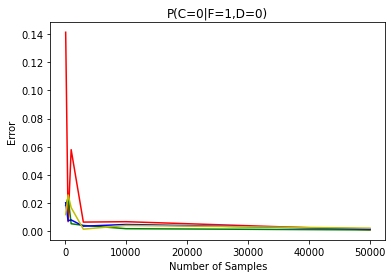

Prior : Red
Rejection : Green
Weighted likelihood : Blue
Gibbs : Yellow


In [153]:
# extra space
# plot for the second query
x_axis = [100, 500, 1000, 3000, 10000, 50000]
y_axis_prior = []
y_axis_reject = []
y_axis_likelihood_weighting = []
y_axis_gibbs = []
for i in x_axis:
    y_estimated = test.sampling(('C',False), {'F': True, 'D': False}, 'Prior', i)
    y_axis_prior.append(np.abs(y_correct_2 - y_estimated))
for i in x_axis:
    y_estimated = test.sampling(('C',False), {'F': True, 'D': False}, 'Rejection', i)
    y_axis_reject.append(np.abs(y_correct_2 - y_estimated))
for i in x_axis:
    y_estimated = test.sampling(('C',False), {'F': True, 'D': False}, 'Likelihood Weighting', i)
    y_axis_likelihood_weighting.append(np.abs(y_correct_2 - y_estimated))
for i in x_axis:
    y_estimated = test.sampling(('C',False), {'F': True, 'D': False}, 'Gibbs', i)
    y_axis_gibbs.append(np.abs(y_correct_2 - y_estimated))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plot the function
plt.plot(x_axis, y_axis_prior, 'r')
plt.plot(x_axis, y_axis_reject, 'g')
plt.plot(x_axis, y_axis_likelihood_weighting, 'b')
plt.plot(x_axis, y_axis_gibbs, 'y')
plt.title("P(C=0|F=1,D=0)")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
# show the plot
plt.show()
print('Prior : Red\nRejection : Green\nWeighted likelihood : Blue\nGibbs : Yellow')

In [10]:
# extra space

For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

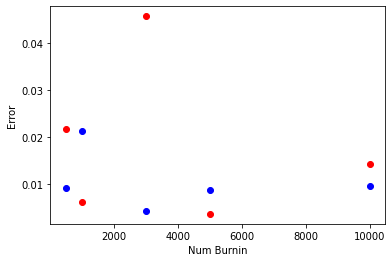

First Query : Red
Second Query : Blue


In [155]:
############################################################
# (2 Points)                                         #
############################################################

#Your code
x_axis = [500, 1000, 3000, 10000, 5000]
y_axis_gibbs_1 = []
y_axis_gibbs_2 = []
y_correct_1 = test.enumeration_ask(('F',True), {'A': True, 'E': False})
y_correct_2 = test.enumeration_ask(('C',False), {'F': True, 'D': False})

for i in x_axis:
    y_estimated_1 = test.sampling(('F',True), {'A': True, 'E': False}, 'Gibbs', 1000, i)
    y_axis_gibbs_1.append(np.abs(y_correct_1 - y_estimated_1))
    y_estimated_2 = test.sampling(('C',False),  {'F': True, 'D': False}, 'Gibbs', 1000, i)
    y_axis_gibbs_2.append(np.abs(y_correct_2 - y_estimated_2))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plot the function
plt.plot(x_axis, y_axis_gibbs_1, 'bo')
plt.plot(x_axis, y_axis_gibbs_2, 'ro')
plt.xlabel("Num Burnin")
plt.ylabel("Error")
# show the plot
plt.show()
print('First Query : Red\nSecond Query : Blue')

In [ ]:
# extra space

In [ ]:
# extra space

# Q3 (20+ 5 Points)

<font size=4>
Author: Kian Bakhtari
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## The Puerto Princesa ship

At midnight on a fall day in the Philippines, a ship leaves Puerto Princesa City's seaport to Macao, China. After one or two hours, the boat loses its GPS connection because of a technical issue. Captain keeps navigating the ship to its destination, using the stars and four old radio towers, which you can see on the map. Each antenna could measure the ship's coordinates (X, Y) and send them to its receiver. There are five records of towers signals at five different times, available for you in the records.json file. Also, the boat's actual coordinates are available in the real_coordinates.json file. The exact coordinates are ONLY FOR EVALUATION PURPOSES, and you CAN NOT use them as input data. The five dots on the map below are actual coordinates of the ship, at each time step where the records from antennas were received. Also, the map is decorative and is not part of the data.

![Figure3-1](./Images/map.png)

Each tower has a noise that is coming from a gaussian distribution, meaning that every (X, Y) pair that is received from an antenna is actually derived from:

X = sample_from_normal_distribution(mean = X_real, std = antenna's std)
Y = sample_from_normal_distribution(mean = Y_real, std = antenna's std)

Information of radio towers (coordinate and noise standard deviation) is available in the towers_info.json file.

The ship's movement between those five different time steps could be mathematically modeled as follows:
At each time step, the ship moves D units to the north and F units to either east or west (half of the times west, and half of the times east). D and F are both samples from exponential distributions with a scale of Y_STEP and X_STEP, respectively. Those parameters are available in the moving_model.json file.

### Hidden Markov Model

At this point, you can build a simple HMM and estimate the ship's coordinates using the conditional probabilities that you have. For each time step, calculate the ship's coordinates at that time step and previous time steps, using the tower records received up to that time. In simpler words, calculate:<br>

P(coor_0 | records_0)<br>
P(coor_1 | records_0, records_1)<br>
...<br>
P(coor_4 | records_0, records_1, records_2, records_3, records_4)<br>


The actual coordinates of the ship in the first time step (coor_0) is coming from a 2-dimensional guassian distribution with the mean of Puerto Princesa city's coordinates and covarianve matrix of INIT_COV (scalar) times the identity matrix. INIT_COV and coordinates of Puerto Princesa city is availabel in moving_model.json file.

## Libraries

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from scipy.stats import norm, expon
import scipy
import pandas as pd

## Data

In [26]:
real_coordinates = json.load(open('./inputs/real_coordinates.json'))
pd.DataFrame(real_coordinates)

,X,Y
0,1087.233417,-57.165368
1,1044.936241,72.343990
2,967.051182,392.826826
3,314.440277,1219.678719
4,590.424895,1413.279887


In [27]:
towers_info = json.load(open('./inputs/towers_info.json'))
pd.DataFrame(towers_info)

,1,2,3,4
x,1405,10,210,630
y,600,880,1890,2090
std,60,110,90,80


In [28]:
moving_model = json.load(open('./inputs/moving_model.json'))
moving_model

{'X_STEP': 300,
 'Y_STEP': 600,
 'INIT_COV': 200,
 'Peurto_coordinates': [1105, -50]}

In [29]:
records = json.load(open('./inputs/records.json'))
pd.DataFrame(records)

,Tower1,Tower2,Tower3,Tower4
0,"[994, -36]","[873, -28]","[958, 70]","[1077, -128]"
1,"[1053, 63]","[926, 26]","[961, 110]","[905, 82]"
2,"[956, 389]","[1106, 499]","[1005, 397]","[901, 326]"
3,"[331, 1227]","[377, 1232]","[270, 1282]","[232, 1051]"
4,"[520, 1376]","[577, 1446]","[397, 1456]","[648, 1364]"


## Functions

In [30]:
tower_records = [(records.get('Tower1')[i],
                  records.get('Tower2')[i], 
                  records.get('Tower3')[i], 
                  records.get('Tower4')[i]) for i in range(5)]

In [31]:
tower_records

[([994, -36], [873, -28], [958, 70], [1077, -128]),
 ([1053, 63], [926, 26], [961, 110], [905, 82]),
 ([956, 389], [1106, 499], [1005, 397], [901, 326]),
 ([331, 1227], [377, 1232], [270, 1282], [232, 1051]),
 ([520, 1376], [577, 1446], [397, 1456], [648, 1364])]

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
def get_mean_towers_coor(time_step: int, tower_records: list):
    # The average of all four towers measurements at a given time step
    x = np.average([tower_coor[0] for tower_coor in tower_records[time_step]])
    y = np.average([tower_coor[1] for tower_coor in tower_records[time_step]])
    return x, y


def P_coor0(coor0):
    # Distribuiton of initial coordinates (time step 0)
    x0, y0 = coor0
    return scipy.stats.multivariate_normal.pdf([x0, y0], 
                            mean=moving_model.get('Peurto_coordinates'), cov=moving_model.get('INIT_COV'))


# filling these three functions with apropriate codes: (2 points)

def P_coor_given_prevCoor(coor, prev_coor):
    # Probability of coordinates at time step i, given the coordinates of time step i-1
    ############################################################
    #                                                          #
    #                    Your code here                        #
    #                                                          #
    #                                                          #
    ############################################################
    pass

    
def P_towerCoor_given_coor(tower_coor, tower_std, coor):
    # Probability of a tower measurement, given the coordinates of the ship
    ############################################################
    #                                                          #
    #                    Your code here                        #
    #                                                          #
    #                                                          #
    ############################################################
    pass
    
    
def P_record_given_coor(rec, coor, towers_info):
    # All four measurements of all four towers at time step i, is called the record of thime step i.
    # This function returns the probability of a record given the ship's coordinates.
    ############################################################
    #                                                          #
    #                    Your code here                        #
    #                                                          #
    #                                                          #
    ############################################################
    pass


In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
def real_coor(time_step):
    return round(real_coordinates.get('X')[time_step]), round(real_coordinates.get('Y')[time_step])

def dist(coor_a, coor_b):
    return round(np.sqrt((coor_a[0] - coor_b[0])**2 + (coor_a[1] - coor_b[1])**2))

coor0_estimations = []
coor1_estimations = []
coor2_estimations = []
coor3_estimations = []

#### Estimating coordinates_0 from P(coor_0) and record_0

In the cell below, you can see the approach for finding the argmax of P(coor_0 | record_0), which is equal to argmax of P(record_0 | coor_0) times P(coor_0).
We are not using derivatives to find the argmax, we are actually doing it numerically by trying different coordinates and seeing which one provides the highest probability. <br>

#### Recommended approach: You can use gradient descent to find the argmax of probability function, and that will give you 5 extra points.

In [ ]:
# argmax P(coor_0 | record_0) = argmax P(record_0 | coor_0) P(coor_0)

best_x0, best_y0 = None, None

max_Px, max_Py = 0, 0
interval, step = 30, 5
# Larger interval and smaller step will lead to a more accurate result, but will increase computational 
# complexity deramaticly. Feel free to use other approaches like running this cell more than once and tighten
# the searching interval with smaller steps. 
# Recommended approach: You can use gradient descent to find the argmax of probability
# function, and that will give you 5 extra points.

towers_mean_x0, towers_mean_y0 = get_mean_towers_coor(0, tower_records)

for x0 in range(int(towers_mean_x0 - interval), int(towers_mean_x0 + interval), step):
    for y0 in range(int(towers_mean_y0 - interval), int(towers_mean_y0 + interval), step):
        
        coor0 = (x0, y0)
        rec0 = tower_records[0]

        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
    
        Px = P_rec0_given_x0 * p_c0
        Py = P_rec0_given_y0 * p_c0

        if Px > max_Px:
            best_x0 = x0
            max_Px = Px

        if Py > max_Py:
            best_y0 = y0
            max_Py = Py


coor0_estimations.append((best_x0, best_y0))

In [ ]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')

#### Estimating coordinates_0 and coordinates_1 from P(coor_0), record_0, and record_1<br>(4 points)

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)


max_Px, max_Py = 0, 0
interval, step = 20, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None

towers_mean_x1, towers_mean_y1 = get_mean_towers_coor(1, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
         for x1 in range(int(towers_mean_x1 - interval), int(towers_mean_x1 + interval), step):
            for y1 in range(int(towers_mean_y1 - interval), int(towers_mean_y1 + interval), step):
                    
                coor0 = (x0, y0)
                coor1 = (x1, y1)

                rec0 = tower_records[0]
                rec1 = tower_records[1]

        # Similiar to the cell above, calculate the best estimation
        # of coordinates_0 and coordinates_1
        ############################################################
        #                                                          #
        #                    Your code here                        #
        #                                                          #
        #                                                          #
        ############################################################
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')

#### Estimating coordinates_0, coordinates_1 and coordinates_2 from P(coor_0), record_0, record_1, and record_2 <br> (4 points)

In [ ]:
############################################################
#                                                          #
#                    Your code here                        #
#                                                          #
#                                                          #
############################################################
                    

In [ ]:
# extra space

In [ ]:
# extra space

#### Estimating coordinates_0, coordinates_1, coordinates_2, and coordinates_3 from  P(coor_0), record_0, record_1, record_2, and record_3 <br> (4 points)

In [ ]:
############################################################
#                                                          #
#                    Your code here                        #
#                                                          #
#                                                          #
############################################################
                    

In [ ]:
# extra space

In [ ]:
# extra space

As you know from the theoretical aspect, and you can see from your results, the errors of estimations decrease when you use more records and conditional probabilities.

#### Plot curves that show using more records, leads to decrease of estimation error.<br>( 6 points)


In [ ]:
############################################################
#                                                          #
#                    Your code here                        #
#                                                          #
#                                                          #
############################################################

In [ ]:
# extra space

In [ ]:
# extra space